# CBU5201 mini-project submission

# Author

**Student Name**: Yunzhong Zhang  
**Student ID**: QMID: 210982321 BUPTID: 2021213148

# 1 Clustering, anomaly detection, and visual analysis of face images

## 1.1 Problem formulation

Our goal is to solve a machine learning problem, which is to cluster and detect anomalies in facial images based on features. The appeal of this problem lies in the fact that we hope to have the most typical faces in each cluster, and to find the most distinctive faces in the cluster, thereby deepening our understanding of features and cluster divisions.

## 1.2 Machine Learning pipeline

### 1.2.1 Load Data and Proprocessing stage

This is the first stage of the pipeline. The input is face images stored in a folder, and the output is preprocessed images that have been resized and converted to grayscale. In this stage, we load face images from the specified folder, preprocess the loaded images, including resizing the images for easier processing, and converting the images to grayscale. In addition to this, we also normalize the image data. This is because our feature extraction and subsequent processing do not require color information.

### 1.2.2 Features Extration

In this stage, we extract features from each image. We use the pre-loaded face detector and facial landmark detector in the dlib library to extract 68 key points of the face as features. These key points include the positions of important parts such as eyes, nose, mouth, and facial contours, which can well describe the shape and expression of a face. The input is the preprocessed image, and the output is the 68 facial key point features of each image.

### 1.2.3 Feature Normalization

In this stage, we normalize the extracted features. We create a StandardScaler object, use the feature data to train the scaler for normalization. This can eliminate the impact of dimensions between features, allowing the machine learning model to better learn and understand the features.

### 1.2.4 Clustering

In this stage, we apply the KMeans algorithm to cluster the features. We choose KMeans because it is a classic clustering algorithm that can effectively group faces with similar features into the same cluster. The input is the normalized features, and the output is the clustering result of the KMeans algorithm, that is, the cluster label of each image.

### 1.2.5  Anomaly Detection

This is the final stage of the process. We use the Local Outlier Factor (LOF) algorithm to perform anomaly detection on the features. We choose LOF because it is an effective anomaly detection algorithm that can help us find those faces that stand out, that is, those faces that have a large difference from other faces in the feature space. These faces may be due to the influence of expressions, lighting, posture, etc., and have a large difference from other faces. The input is the normalized features, and the output is the anomaly detection result of the Local Outlier Factor algorithm, that is, whether each image is marked as an outlier.

## 1.3 Transformation stage

 In the transformation stage, we carry out two main steps: feature extraction and normalization.

Feature Extraction: In this step, we extract features from each preprocessed image. We use the dlib library to extract 68 key points of the face as features. These key points include the positions of important parts such as eyes, nose, mouth, and facial contours, which can well describe the shape and expression of a face. These features will serve as the input for our subsequent machine learning model.

Normalization of Features: In this step, we normalize the extracted features. Normalization is a common data preprocessing technique that can eliminate the impact of dimensions between features, allowing the machine learning model to better learn and understand the features. In this step, we use StandardScaler for normalization, which adjusts the mean of the features to 0 and the standard deviation to 1.

## 1.4 Modelling

In this project, we built two machine learning models: KMeans and Local Outlier Factor (LOF).

KMeans: KMeans is an unsupervised clustering algorithm. Its goal is to divide n observations into k sets so that each observation belongs to the set corresponding to the nearest mean (cluster center). In our project, we use KMeans to cluster the extracted facial features to find faces with similar features. We chose KMeans because it is a classic clustering algorithm suitable for handling our problem.

Local Outlier Factor (LOF): LOF is an unsupervised algorithm used for anomaly detection. It detects anomalies by comparing the local density of a point with the local density of its neighbors. In our project, we use LOF to perform anomaly detection on the extracted facial features to find those faces that stand out. We chose LOF because it is an effective anomaly detection algorithm that can help us find those faces that have a large difference from other faces in the feature space.

## 1.5 Methodology

Model Training: We use the extracted and normalized facial features to train our KMeans and LOF models. For KMeans, we input the feature data into the model, and the model finds the best cluster centers through an iterative process. For LOF, we also input the feature data into the model, and the model calculates the local outlier factor of each data point to identify outliers.

Model Validation: Since our problem is an unsupervised learning problem, we do not have label data for model validation. However, we can validate our model through visualization. For example, we can visualize the clustering results and anomaly detection results in a two-dimensional space to observe the effect of clustering and the distribution of outliers.

Performance Evaluation: For unsupervised learning problems, performance evaluation is usually more complex than supervised learning problems. In our project, we mainly evaluate the performance of the model through visualization and actual application scenarios. For KMeans, we can observe the shape and size of different clusters, as well as the distance between clusters, to evaluate the effect of clustering. For LOF, we can observe the number and distribution of data points marked as outliers to evaluate the effect of anomaly detection. In addition, we can also apply our model to actual face recognition and analysis tasks to evaluate the performance of the model through actual application effects.

## 1.6 Dataset

Before using the dataset, we performed some preprocessing steps. First, we resized each image to 100x100 pixels to ensure that all images are of the same size, which facilitates subsequent processing. Then, we converted the images to grayscale because our feature extraction does not require color information.

We also visualized the extracted features. We used PCA to reduce the features to 2 dimensions, then plotted all the points of each cluster in the two-dimensional space, and marked the outliers with special colors. In addition, we calculated the center of each cluster and found the points closest and farthest from the center (i.e., the most typical and atypical points). Finally, we displayed the images of the most typical and atypical points in subplots. These visualizations help us better understand the data and the performance of the model.

## 1.7 Results

c:\Users\张蕴中\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Found 12 outliers.
The indices of the outliers are: [  98  406  649  946 1045 2026 2073 2530 2612 2789 3705 3800]


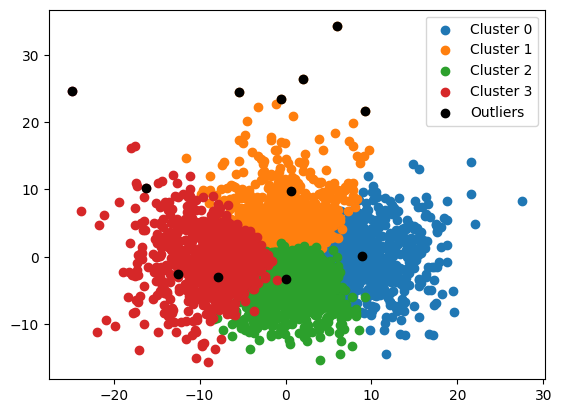

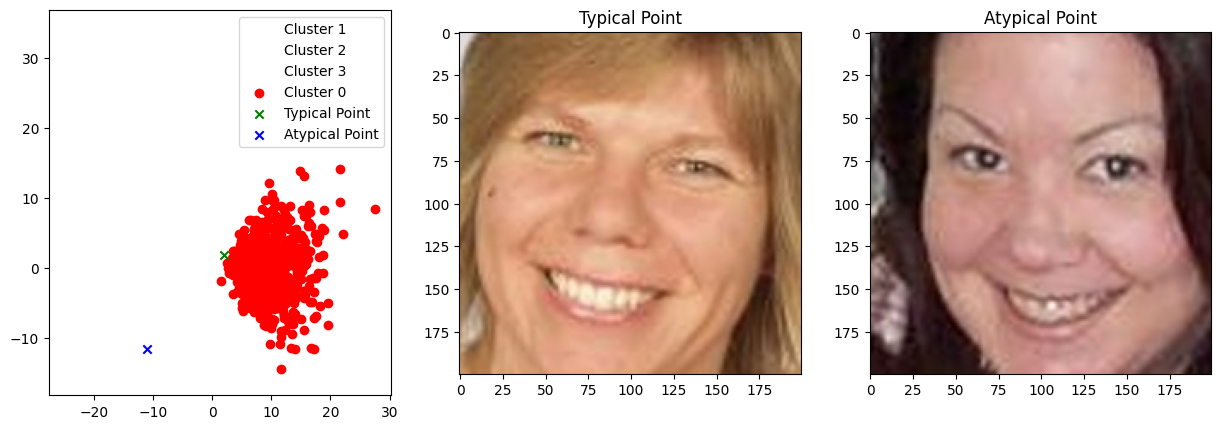

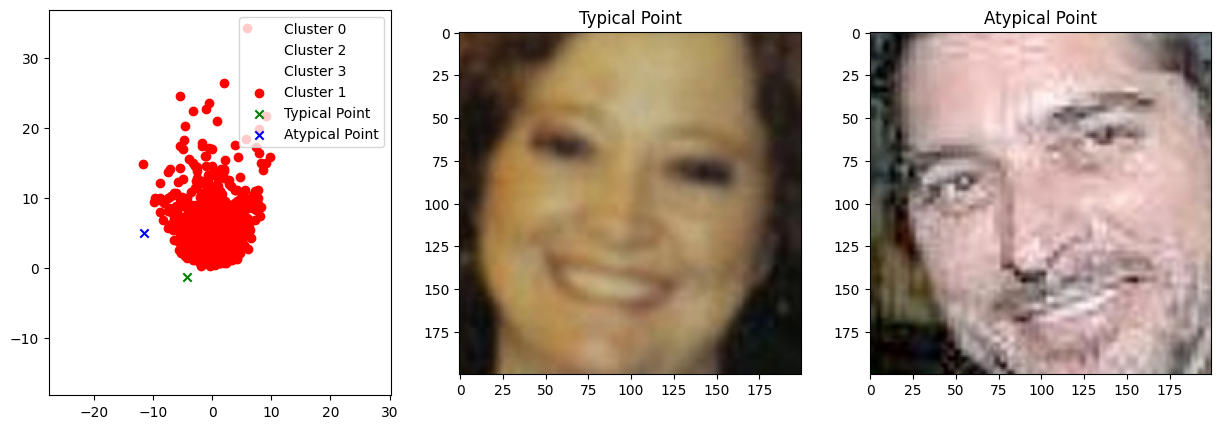

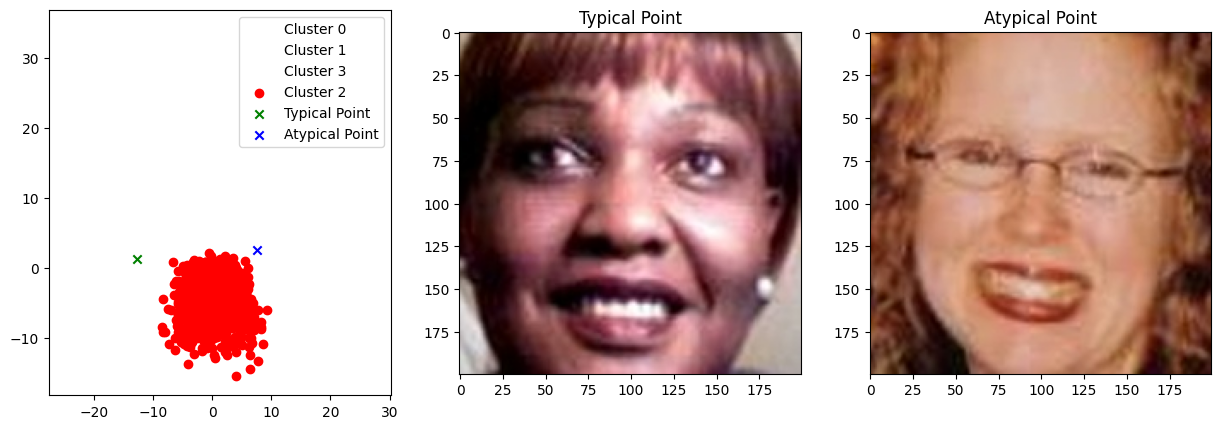

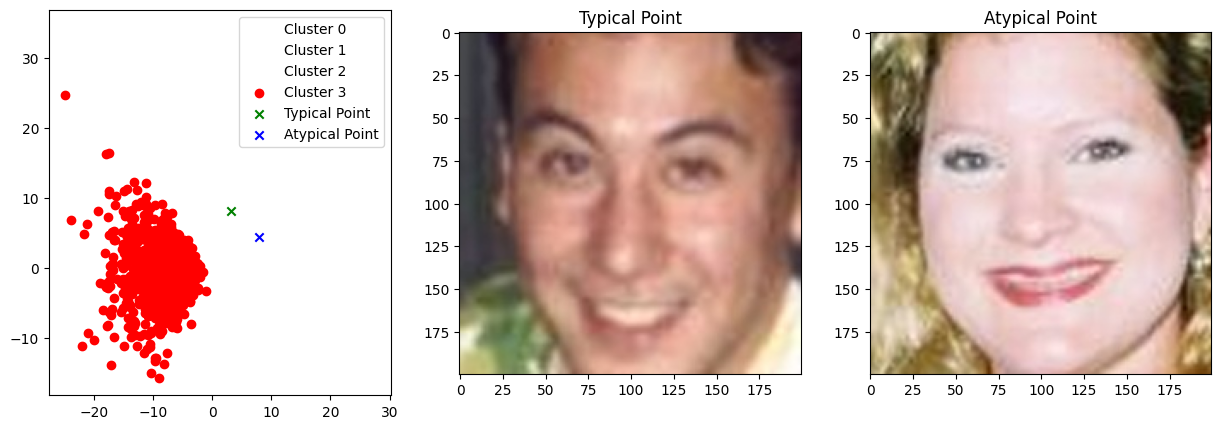

In [2]:
IMG_SIZE = 100
import cv2
import dlib
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 加载人脸检测器和人脸关键点检测器
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('D:\\CollegeStuff\\shape_predictor_68_face_landmarks.dat')
def load_img(img_dir):
    images = []
    # Read image
    for filename in os.listdir(img_dir):
        if filename.endswith('.jpg'):
            img = cv2.imread(os.path.join(img_dir, filename))
            if img is None:
                print(f"Image file {filename} not found.")
            else:
                # Resize image
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                images.append(img)
    return np.array(images)

# Data preprocessing
def preprocess_data(images):
    # Normalize the image data to the range 0-1.
    images = images.astype('float32') / 255.0
    return images

def extract_features(images):
    all_features = []
    # 读取图片
    for image in images:
        # 假设整个图片就是一个人脸
        height, width = image.shape
        face = dlib.rectangle(0, 0, width, height)
        # 提取68个特征点
        landmarks = predictor(image, face)
        # 提取五官特征点
        features = []
        for i in range(68):
            x = landmarks.part(i).x
            y = landmarks.part(i).y
            features.append((x, y))
        features = np.array(features).flatten()
        all_features.append(features)
    return all_features

images = load_img('files_choped')
# 初始化一个空的列表来存储特征向量
features = []
features = extract_features(images)
images = preprocess_data(images)

from sklearn.preprocessing import StandardScaler
def normalize_features(features):
    # 初始化StandardScaler对象
    scaler = StandardScaler()
    
    # 使用特征数据训练scaler，并对特征进行归一化
    normalized_features = scaler.fit_transform(features)
    
    return normalized_features
features = normalize_features(features)

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features)

from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 使用LOF进行异常检测
lof = LocalOutlierFactor(n_neighbors=300, contamination=0.003)
y_pred = lof.fit_predict(features)

# 将标记为-1的点视为异常点
outliers = np.where(y_pred == -1)[0]

print(f"Found {len(outliers)} outliers.")
print(f"The indices of the outliers are: {outliers}")

# 使用PCA将特征降到2维
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# 获取所有的簇标签
cluster_labels = kmeans.labels_
import matplotlib.image as mpimg
def get_image_by_index(index):
    # 打印图片
    img = mpimg.imread(f'files_choped/file{index+1}.jpg')
    return img

# 获取所有的簇标签
cluster_labels = kmeans.labels_

# 对于每个簇
for i in range(kmeans.n_clusters):
    # 绘制该簇的所有点
    plt.scatter(reduced_features[cluster_labels == i, 0], reduced_features[cluster_labels == i, 1], label=f'Cluster {i}')
# 使用特殊颜色标注异常点
plt.scatter(reduced_features[outliers, 0], reduced_features[outliers, 1], c='black', label='Outliers')
plt.legend()
plt.show()


# 对于每个簇
for i in range(kmeans.n_clusters):
    # 创建一个新的图形
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # 在第一个子图中，先绘制其他的簇
    for j in range(kmeans.n_clusters):
        if j != i:
            axs[0].scatter(reduced_features[cluster_labels == j, 0], reduced_features[cluster_labels == j, 1], color='white',
                            label=f'Cluster {j}')

    # 计算当前簇的中心
    cluster_center = np.mean(reduced_features[cluster_labels == i], axis=0)

    # 找到离中心最近和最远的点
    distances = np.linalg.norm(reduced_features[cluster_labels == i] - cluster_center, axis=1)
    typical_point_index = np.argmin(distances)
    atypical_point_index = np.argmax(distances)
    typical_point = reduced_features[typical_point_index]
    atypical_point = reduced_features[atypical_point_index]

    # 在第一个子图中，再绘制当前的簇和特殊的点
    axs[0].scatter(reduced_features[cluster_labels == i, 0], reduced_features[cluster_labels == i, 1], color='red',
                    label=f'Cluster {i}')
    axs[0].scatter(typical_point[0], typical_point[1], c='green', marker='x', label='Typical Point')
    axs[0].scatter(atypical_point[0], atypical_point[1], c='blue', marker='x', label='Atypical Point')

    # 在第二个和第三个子图中，展示最典型和最不典型点的图片（这需要你有一个函数可以根据索引获取对应的图片）
    typical_image = get_image_by_index(typical_point_index)  # 你需要自己实现这个函数
    atypical_image = get_image_by_index(atypical_point_index)  # 你需要自己实现这个函数
    axs[1].imshow(typical_image)
    axs[1].set_title('Typical Point')
    axs[2].imshow(atypical_image)
    axs[2].set_title('Atypical Point')

    # 在创建完所有的图形元素之后调用axs[0].legend()
    axs[0].legend()
    plt.show()

The images corresponding to these indices are marked as anomalies by the LOF algorithm, meaning that the facial features of these images differ significantly from most other images in the dataset. The first image shows four different clusters in four different colors, and the outliers detected by the LOF algorithm are marked in black and printed out as indices. 

The next four images show the most typical and atypical data in each cluster, marked in green and blue respectively, which is calculated based on the distance from the center. On the right are the most typical and atypical images, and we can infer the group characteristics of the cluster based on the differences between the two images.

# 9 Conclusions

In my code, I first loaded the Haar cascade classifier, which is a powerful tool for face detection. Then, I preprocessed the images, including resizing the images and converting them to grayscale, these steps help to reduce computational complexity and improve processing speed. Next, I used the dlib library to extract 68 key points of the face as features, these features can well describe the shape and expression of a face. Then, I used KMeans for clustering to find faces with similar features. Finally, I used the Local Outlier Factor (LOF) for anomaly detection to find those faces that stand out. 

I think the direction for optimization is to use other clustering and anomaly detection algorithms such as DBSCAN and Isolation Forest to try to further improve the performance of the model.